**Task 6:** Find a data set which is suitable for classification (you can use one of the data sets which you used in Task 3 and Task 4) with **numerical features** only (if the data set involves categorical ones in addition to numerical ones, you can drop the categorical ones). Build a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier with `penalty=None` which requires scaling of numerical features with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and dimension reduction of numerical features with [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Show us the workflow and report the accuracy of the resulting model on the unseen data.


In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Data Set Description
## Statlog (Australian Credit Approval) Dataset 

This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.
  
This dataset is interesting because there is a good mix of attributes -- `continuous`, `nominal with small numbers of values`, and `nominal with larger numbers of values`.  There are also a few missing values.

**Attribute Information**

- `A1`: 0,1    CATEGORICAL (formerly: a,b)
- `A2`: continuous.
- `A3`: continuous.
- `A4`: 1,2,3    CATEGORICAL  (formerly: p,g,gg)
- `A5`: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)
- `A6`: 1, 2,3, 4,5,6,7,8,9    CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z)
- `A7`: continuous.
- `A8`: 1, 0    CATEGORICAL (formerly: t, f)
- `A9`: 1, 0 CATEGORICAL (formerly: t, f)
- `A10`:  continuous.
- `A11`:  1, 0 CATEGORICAL (formerly t, f)
- `A12`:  1, 2, 3    CATEGORICAL (formerly: s, g, p) 
- `A13`:  continuous.
- `A14`:  continuous.


**Class Attribute**
- `A15`:   0,1  class attribute (formerly: +,-)  


**For more details check:** https://archive-beta.ics.uci.edu/dataset/143/statlog+australian+credit+approval

To solve this problem, we'll follow the specified workflow step by step.

## Step 1: Loading the Dataset
We'll start by loading the Statlog (Australian Credit Approval) dataset. Since the dataset contains both numerical and categorical features, we'll drop the categorical features and only keep the numerical ones.


In [2]:
# Load Data
import pandas as pd
import numpy as np

aus_df = pd.read_csv("datasets/australian.csv", header=None )
aus_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
# Add the column Name to the Dataset
aus_df.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9",
                  "A10", "A11", "A12", "A13", "A14", "A15"]

# Drop categorical features
aus_df = aus_df.drop(["A1", "A4", "A5", "A6", "A8", "A9", "A11", "A12"], axis=1)

aus_df.head()

,A2,A3,A7,A10,A13,A14,A15
0,22.08,11.46,1.585,0,100,1213,0
1,22.67,7.00,0.165,0,160,1,0
2,29.58,1.75,1.250,0,280,1,0
3,21.67,11.50,0.000,11,0,1,1
4,20.17,8.17,1.960,14,60,159,1


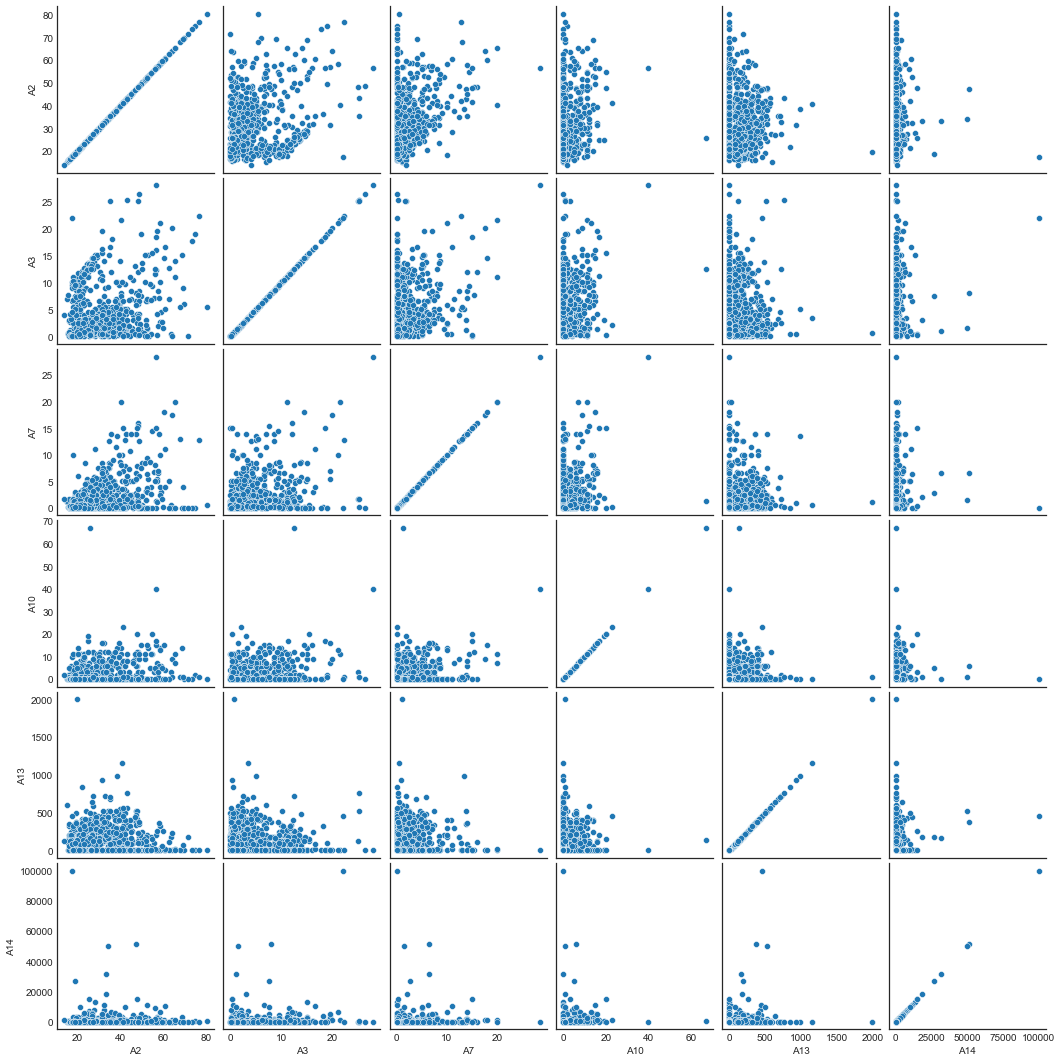

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [26, 14]
plt.style.use('seaborn-white')

sns.pairplot(aus_df, vars = ["A2", "A3", "A7", "A10", "A13", "A14"], diag_kind = None);

The scatter plots explains their is a high pairwise correlation between attributes however their is low corelation between `A3-A2`, `A7-A2` and `A7-A3`.

## Step 2: Preprocessing
Next, we'll perform the preprocessing steps, including splitting the data into train and test sets, scaling the numerical features using `StandardScaler`, and reducing the dimensionality using `PCA`.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target variable
X = aus_df.drop("A15", axis=1)
y = aus_df["A15"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce dimensionality using PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Select the number of principal components
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)
print("Explianed Variance Ratio:", explained_var_ratio)
print("Cummulative Variance Ratio", cumulative_var_ratio)

Explianed Variance Ratio: [0.3385404  0.18273277 0.15221958 0.12809048 0.10961857 0.08879821]
Cummulative Variance Ratio [0.3385404  0.52127317 0.67349275 0.80158323 0.91120179 1.        ]


### Explianed Variance

The explained variance ratio measures the proportion of total variance explained by each principal component in PCA. For example, the first component explains approximately 33.85% of the variance, the second explains 18.27%, and so on. The cumulative variance ratio shows the accumulated variance explained by adding each component in sequence. Using the first three components captures about 67.35% of the variance, and using all six captures 100%. These ratios help determine the contribution and amount of information captured by each principal component in PCA.

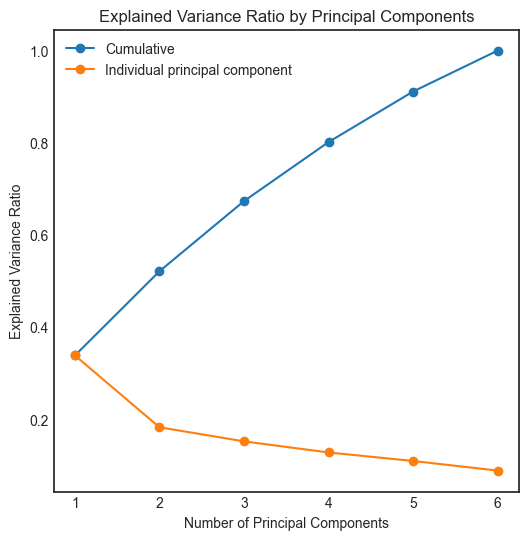

In [6]:
# Plot explained variance ratio
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6, 6]

plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o', label='Cumulative')
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio,  marker='o', label='Individual principal component')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Principal Components")
plt.legend()
plt.show()

Based on the plot, we can select the appropriate number of principal components that explain a significant portion of the variance. Let's assume we choose 4 principal components for further analysis.

## Step 3: Visualization
To visualize the first two principal components in the train and test data, we'll create scatter plots with different colors representing the class labels.


### Visualization of first two Principal Components

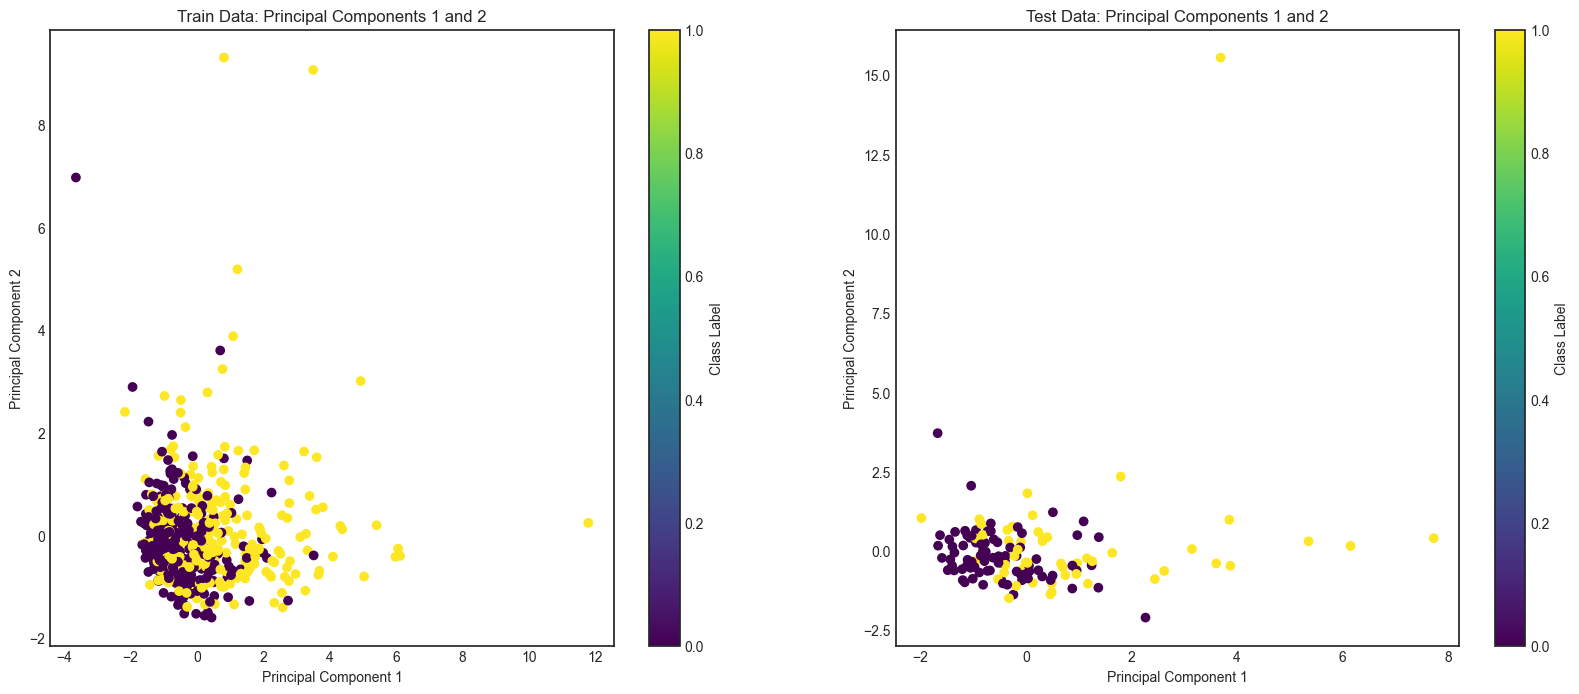

In [7]:
plt.rcParams['figure.figsize'] = [20, 8]

# Visualize the first two principal components in the train data
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Train Data: Principal Components 1 and 2")
plt.colorbar(label="Class Label")

# Visualize the first two principal components in the test data
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Test Data: Principal Components 1 and 2")
plt.colorbar(label="Class Label")
plt.show()

Based on the scatter plots, we can observe how the class labels are distributed with respect to the first two principal components.
This visualization helps us understand if there is a clear separation or pattern between the classes based on the principal components. It allows us to visually inspect if the logistic regression model would be able to separate the classes effectively in this reduced-dimensional space.

The pairwise scatter plot of first two principal components shows that the two classes are overlapping, it indicates that there is no clear separation between the classes based on the first two principal components. 

This suggests that the logistic regression model may struggle to accurately classify the data, as there is significant intermixing between the classes. In such a case, it is likely that the model's accuracy on both the training and testing data will be lower, as it will have difficulty establishing distinct decision boundaries to separate the classes. So we consider first three Principal Components for analysis.

### Visualization of first three Principal Component

To Visualize the first three components we'll create a 3D scatter plot with two different colors for train and test data.

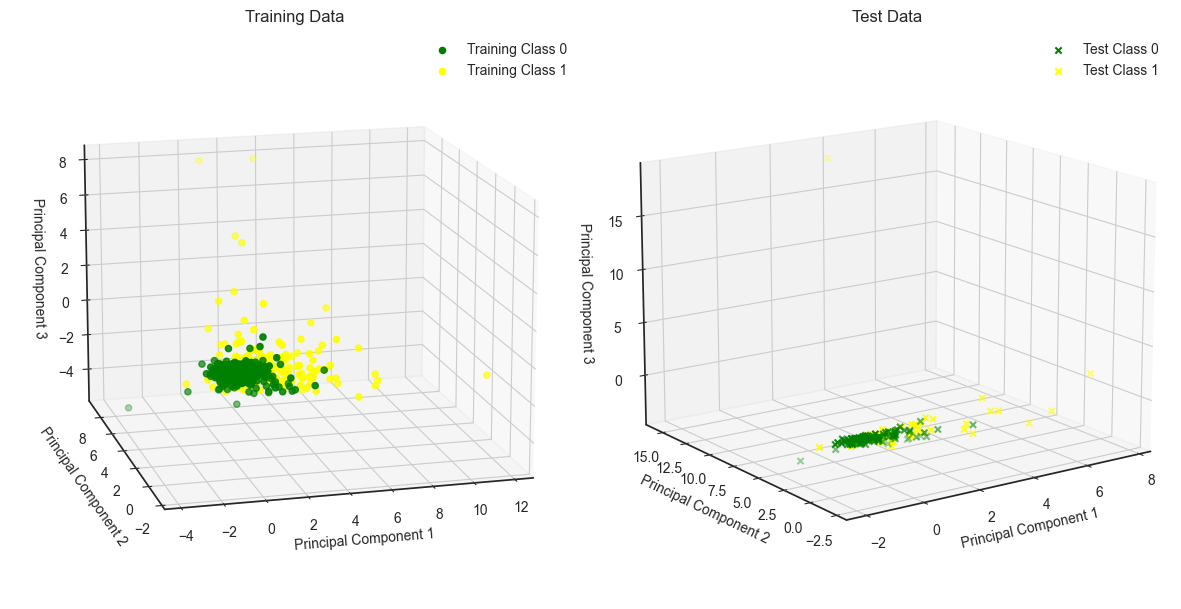

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating a colormap for class labels
color_map = {0: 'green', 1: 'yellow'}

# Creating a figure and axes for the subplots
fig = plt.figure(figsize=(12, 6))

# Subplot for the training data
ax1 = fig.add_subplot(121, projection='3d')
for label in set(y_train):
    ax1.scatter3D(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], X_train_pca[y_train == label, 2],
                  c=color_map[label], label=f'Training Class {label}')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.set_title('Training Data')
ax1.legend()

# Setting the viewing angle towards Principal Component 1
ax1.view_init(elev=15, azim=-105)  # Adjust the values for the desired rotation

# Subplot for the test data
ax2 = fig.add_subplot(122, projection='3d')
for label in set(y_test):
    ax2.scatter3D(X_test_pca[y_test == label, 0], X_test_pca[y_test == label, 1], X_test_pca[y_test == label, 2],
                  c=color_map[label], marker='x', label=f'Test Class {label}')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.set_title('Test Data')
ax2.legend()

# Setting the viewing angle towards Principal Component 1
ax2.view_init(elev=15, azim=-125)  # Adjust the values for the desired rotation

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


From the 3D graph, it is evident that the two classes do not completely overlap. There is a possibility that these classes can be separated more effectively than what was observed in the previous visualizations. The additional dimension provided by the 3D plot allows for a better understanding of the distribution and potential separation between the classes.

## Step 4: Implement Classifier
Now, we'll build a logistic regression classifier using the preprocessed (scaled and dimension reduced) data.

In [9]:
from sklearn.linear_model import LogisticRegression

# Build the logistic regression classifier
classifier = LogisticRegression(penalty=None)

# Fit the classifier on the preprocessed training data
classifier.fit(X_train_pca[:, :3], y_train)


LogisticRegression(penalty=None)

## Step 5: Evaluation
Finally, we'll evaluate the accuracy of the built classifier on the train and test data and provide conclusions based on the results.


In [10]:
from sklearn.metrics import accuracy_score

# Predict on train and test data
y_train_pred = classifier.predict(X_train_pca[:, :3])
y_test_pred = classifier.predict(X_test_pca[:, :3])

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Accuracy on Test Data: %.2f %%" % (train_accuracy*100))
print("Accuracy on Test Data: %.2f %%" % (test_accuracy*100))


Accuracy on Test Data: 76.09 %
Accuracy on Test Data: 75.36 %


The train and test accuracies of the logistic regression classifier on the preprocessed data are `76.09%` and `75.36%` respectively. These accuracies allow us to assess if the model suffers from underfitting or overfitting. The similar performance on both train and test data suggests that the model is not heavily overfit or underfit.

In this case the model doesn't suffer from overfitting.

We assumed the appropriate number of principal components to be 3 for the logistic regression classifier. If the visualization of the first two principal components revealed a different story, we would need to adjust the number of components accordingly.


## Conclusion

Based on the visualization of the first two principal components, it was observed that the classes in the data were overlapping and there was no clear separation between them. This suggests that using only two principal components may not be sufficient to capture the underlying patterns and variations in the data. 

Therefore, we decided to include an additional principal component, resulting in a total of three principal components. This additional dimension may provide more information and help improve the accuracy of the logistic regression model.

The logistic regression model with three principal components achieved an accuracy of 75.36% on the test set and 76.09% on the training set. These accuracy values indicate that the model is performing reasonably well in terms of classification. However, it is worth noting that the accuracies on both the test and training sets are relatively close, which suggests that the model may not be overfitting or underfitting the data significantly.

Overall, based on the accuracies obtained and the observation of overlapping classes in the visualization, the logistic regression model with three principal components appears to be a reasonable choice for this data set.

In [11]:
import session_info
session_info.show()